# Exploring and Visualizing Data

Let's start with the research question: is continental philosophy (critical theory) waning in popularity? Of course, "popularity" is not something we can directly measure, except by proxy. But through the Open Library API, we might be able to gather publications statistics for a few writers, and make a guess. If Foucault's books, or Derrida's, are still in print, this will allow us a more educated guess of whether they're still being discussed. 

[Open Library's API documentation](https://openlibrary.org/dev/docs/api/search) tells us that this is an example book search queryl for a particular author: 

http://openlibrary.org/search.json?author=foucault

We can translate that into a `requests` query. But first, get the necessary libraries:   

In [1]:
import requests
import json

# This is our data analysis library, Pandas
import pandas

# And this is to tell Jupyter that we want to see our plots in this notebook. 
%matplotlib inline

Then add the parameters. We'll use a single author to start with, Michel Foucault: 

In [2]:
author = "Michel Foucault"
params = {'author': author }
response = requests.get('http://openlibrary.org/search.json', params=params)

Make sure to check whether the response came back `200` or "OK": 

In [3]:
response

<Response [200]>

Parse the results: 

In [4]:
parsedJSON = json.loads(response.text)

Now see what keys we have in the resulting dictionary:

In [5]:
parsedJSON.keys()

dict_keys(['start', 'num_found', 'numFound', 'docs'])

`numFound` is probably the number of books found with this search. 

In [6]:
parsedJSON['numFound']

295

But let's see how many we actually have in `docs`: 

In [7]:
len(parsedJSON['docs'])

100

Only 100 at a time. So maybe we can try a new request, but get the second page. This is a common pattern with APIs: 

In [8]:
author = "Michel Foucault"
params = {'author': author,
          'page': 2}
response = requests.get('http://openlibrary.org/search.json', params=params)

In [9]:
response.ok

True

In [10]:
print(response.text[:500])

{
 "start": 100,
 "num_found": 295,
 "numFound": 295,
 "docs": [
  {
   "title_suggest": "Historia de La Locura En La Epoca Clasica 2t.",
   "edition_key": [
    "OL9172345M"
   ],
   "isbn": [
    "9681602684",
    "9789681602680"
   ],
   "has_fulltext": false,
   "text": [
    "OL9172345M",
    "9681602684",
    "9789681602680",
    "Michel Foucault",
    "OL4346031A",
    "Historia de La Locura En La Epoca Clasica 2t.",
    "Philosophy",
    "General",
    "/works/OL9172345M",
    "Fondo De 


In [11]:
parsedJSON = json.loads(response.text)

In [12]:
len(parsedJSON['docs'])

100

What kinds of data can we get about these books? Since the JSON parser gives us a Python dictionary, we can use the `keys()` method on the first book to see what kind of data is in it: 

In [13]:
parsedJSON['docs'][0].keys()

dict_keys(['title_suggest', 'edition_key', 'isbn', 'has_fulltext', 'text', 'author_name', 'seed', 'author_alternative_name', 'author_key', 'subject', 'title', 'publish_date', 'type', 'ebook_count_i', 'edition_count', 'key', 'id_goodreads', 'publisher', 'language', 'last_modified_i', 'id_librarything', 'publish_year', 'first_publish_year'])

`publish_year` sounds like a promising field. What's in it? 

In [14]:
pubYears = parsedJSON['docs'][0]['publish_year']
pubYears

[1998]

How about some of the other fields? 

In [15]:
parsedJSON['docs'][0]['title']

'Historia de La Locura En La Epoca Clasica 2t.'

In [17]:
parsedJSON['docs'][0]['first_publish_year']

1998

Let's take `pubYears`, the list of publication years for _Histoire de la sexualité_, and plot it. First, we make a pandas `Series` out of it, and then we call the `Series` method `.hist()`, which plots a histogram of those years for us. 

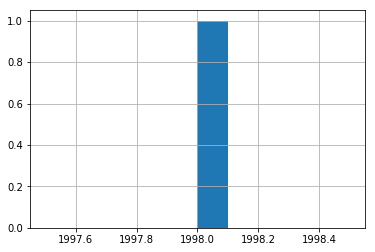

In [18]:
pandas.Series(pubYears).hist()

Cool. What if we were to do this for all 100 books in our API response? All we need to do is write a `for` loop to go through each book, and add the list of publication years to our master list of all publication years: 

In [19]:
# Initialize an empty list for us to accumulate our publication years.
allPubYears = [] 

# Go through each book (the first 100, anyway)
for doc in parsedJSON['docs']: 
    # Check to make sure the current book has this field, 
    # first, or else it'll fail. 
    if 'publish_year' in doc: 
        allPubYears = allPubYears + doc['publish_year']

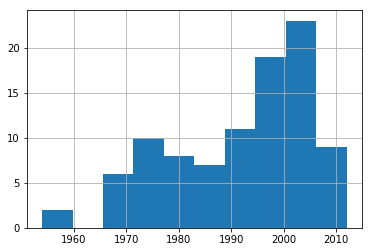

In [20]:
foucaultPubYears = pandas.Series(allPubYears)
foucaultPubYears.hist()

Wow, Foucault's books seem to be increasing in popularity, but not as many books have been published in the past decade. Let's see about Derrida's. If I weren't so lazy, I'd write a function so that I wouldn't have to reuse my code like this. But since I'm lazy, I'll just copy and paste the cells from above.

In [21]:
author = "Jacques Derrida"
params = {'author': author }
response = requests.get('http://openlibrary.org/search.json', params=params)

In [22]:
response.ok

True

In [23]:
parsedJSON = json.loads(response.text)

In [24]:
parsedJSON['numFound']

315

In [25]:
# Initialize an empty list for us to accumulate our publication years.
allPubYears = [] 

# Go through each book (the first 100, anyway)
for doc in parsedJSON['docs']: 
    # Check to make sure the current book has this field, 
    # first, or else it'll fail. 
    if 'publish_year' in doc: 
        allPubYears = allPubYears + doc['publish_year']

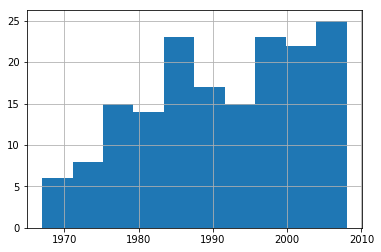

In [26]:
derridaPubYears = pandas.Series(allPubYears)
derridaPubYears.hist()

Wow, even more so. How about Karl Marx? 

In [27]:
author = "Karl Marx"
params = {'author': author }
response = requests.get('http://openlibrary.org/search.json', params=params)

In [28]:
response.ok

True

In [29]:
parsedJSON = json.loads(response.text)

In [30]:
# Initialize an empty list for us to accumulate our publication years.
allPubYears = [] 

# Go through each book (the first 100, anyway)
for doc in parsedJSON['docs']: 
    # Check to make sure the current book has this field, 
    # first, or else it'll fail. 
    if 'publish_year' in doc: 
        allPubYears = allPubYears + doc['publish_year']

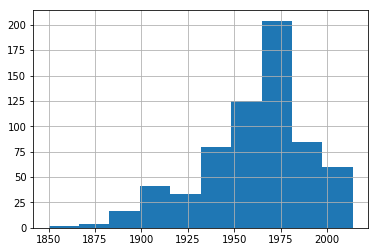

In [31]:
marxPubYears = pandas.Series(allPubYears)
marxPubYears.hist()

Wow, Marx seems to be most active around 1975. 

### Exercise

Determine whether, according to the Open Library API, at least, a writer of your choosing is gaining or losing popularity. Plot a histogram. (Bonus: save your histogram to your computer by right-clicking on the image, and post it to Twitter with the DHSI hashtag!)

## How many editions were published of each of Karl Marx's books?

Let's manipulate these data some other ways. Let's say we want to find edition counts for each book. We can create a dictionary where the key is the book title, and the value is the edition counts, i.e. `{bookTitle: editionCounts}`. 

In [ ]:
# First, initialize an empty dictionary. 
editionsPerBook = {}

# Now, go through each book, 
for doc in parsedJSON['docs']: 
    # If the book has an edition count,
    if 'edition_count' in doc:
        # Grab the title of the bookm
        title = doc['title']
        # And the number of editions,
        counts = doc['edition_count']
        # And add a dictionary entry where the key is the title,
        # and the value is the number of editions. 
        editionsPerBook[title] = counts

In [41]:
editionsPerBook

{'A Contribution to the critique of political economy': 1,
 'Achtzehnte Brumaire des Louis Bonaparte': 32,
 'Anarchism and anarcho-syndicalism': 6,
 'Articles on Britain': 4,
 'Articles on India': 4,
 'Ausgewählte Schriften in zwei Bänden': 3,
 'Basic writings on politics and philosophy': 11,
 'Briefe über "Das Kapital"': 20,
 'Bürgerkrieg in Frankreich': 29,
 'Collected Works': 42,
 'Collected works (of) Karl Marx (and) Frederick Engels': 4,
 'Communist manifesto, socialist landmark': 7,
 'Das Kapital': 48,
 'Deutsche Ideologie': 42,
 'Die Frühschriften': 3,
 'ENTHÜLLUNGEN ÜBER DEN KOMMUNISTENPROZESS ZU KÖLN': 3,
 'Early writings': 10,
 'Economic and philosophic manuscripts of 1844': 17,
 'El Capital': 5,
 'Essential writings of Karl Marx': 9,
 'Frühe Schriften': 3,
 'Genesis of capital': 3,
 'Gesamtausgabe': 3,
 'Gesamtausgabe (MEGA)': 10,
 'Grundrisse der Kritik der politischen Ökonomie': 14,
 'Ireland and the Irish question': 7,
 'K. Marks i F. Ėngelʹs ob iskusstve': 3,
 'K. Marx a

OK great. Now what are the most popular of these? Let's visualize it using Pandas. Since we  only have one column of numeric data, we can use a `Series` again. This time we'll also add the method `sort_values()` to sort them, `ascending=False` to tell it to give us the biggest first, and we'll also slice it with `[:10]` to give us the top 10 rows only: 

In [35]:
marxEditionsPerBook = pandas.Series(editionsPerBook).sort_values(ascending=False)[:10]
marxEditionsPerBook

Manifest der Kommunistischen Partei                                               216
Das Kapital                                                                        48
Selected works                                                                     47
Lohnarbeit und Kapital                                                             44
Deutsche Ideologie                                                                 42
Collected Works                                                                    42
Value, price and profit                                                            38
Misère de la philosophie. Réponse a la philosophie de la misère de M. Proudhon     37
Achtzehnte Brumaire des Louis Bonaparte                                            32
Bürgerkrieg in Frankreich                                                          29
dtype: int64

To plot this, we can just use the pandas `Series` method `.plot()`. We'll tell it that we want a bar chart, since otherwise it'll assume we want a line chart: 

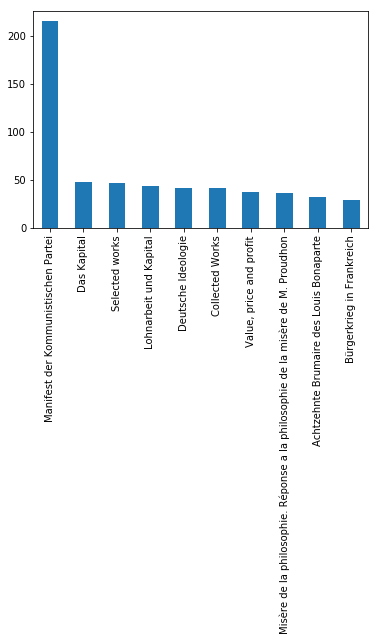

In [36]:
marxEditionsPerBook.plot(kind='bar')

### Exercise

Plot the number of editions published for each of the works of a writer of your choosing. (You'll probably want to pick a writer who has published more than one book, for it to be an interesting graph.)